In [151]:
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd
import itertools

In [152]:
YEARS = 20
TRIALS = 25
WHITE_PCT = 1 - .5

# Gives a tuple of the randomly generated multipliers for green, white, and red,
# based on the values in the write up (p 6).
def get_multipliers_tuple():
    return (rnd.choice([.8, .9, 1.05, 1.1, 1.2, 1.4]), rnd.choice([.06, .2, 1, 3, 3, 3]), rnd.choice([.9, 1, 1, 1, 1, 1.1]))

# Performs a single simulation of all four stratgies for YEARS years, returns the results
# as a dictionary of lists.
def get_simulation(pct_red = .5):
    all_multipliers = [get_multipliers_tuple() for x in range(YEARS)]
    green = list(itertools.accumulate([1000] + [tup[0] for tup in all_multipliers], lambda x, y: x * y))
    red = list(itertools.accumulate([1000] + [tup[1] for tup in all_multipliers], lambda x, y: x * y))
    white = list(itertools.accumulate([1000] + [tup[2] for tup in all_multipliers], lambda x, y: x * y))
    pink = list(itertools.accumulate(
        [1000] + [tup[1] * pct_red + tup[2] * (1 - pct_red) for tup in all_multipliers], lambda x, y: x * y))
    return {'green': green, 'red': red, 'white': white, 'pink': pink}

# Plots a single simulation.
def plot_simulation(simul):
    plt.clf()
    plt.plot(range(len(simul['green'])), simul['green'], 'g', label='Green')
    plt.plot(range(len(simul['red'])), simul['red'], 'r', label='Red')
    plt.plot(range(len(simul['white'])), simul['white'], '.8', label='White')
    plt.plot(range(len(simul['pink'])), simul['pink'], 'tab:pink', label='Pink')
    plt.xticks(range(0, YEARS + 1, 2))
    plt.xlabel('Years')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

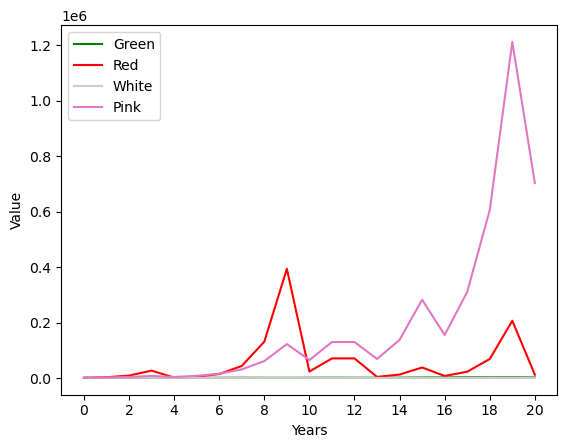

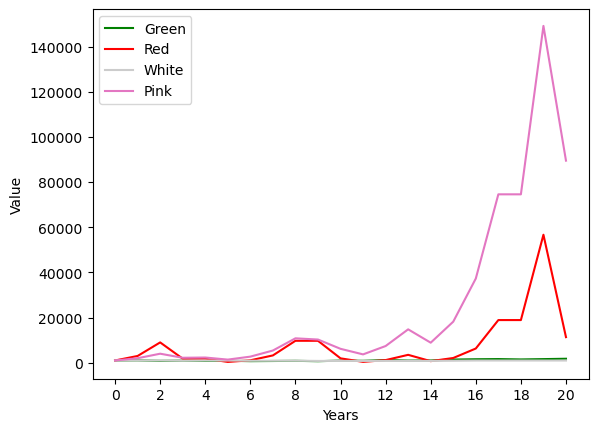

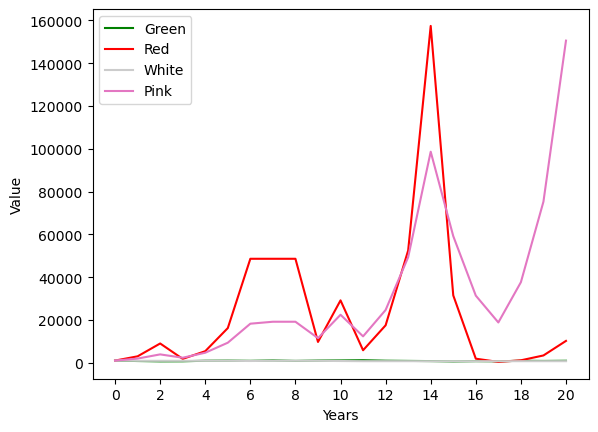

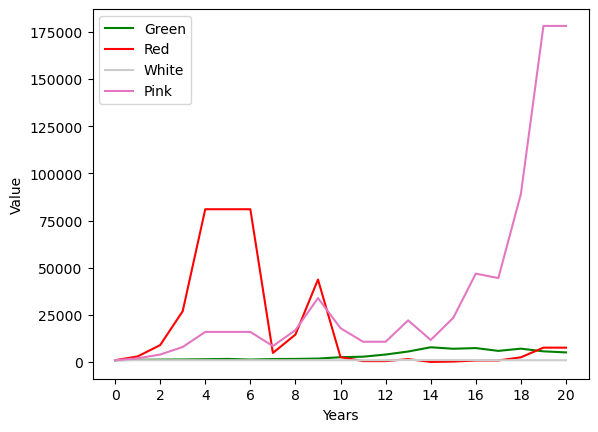

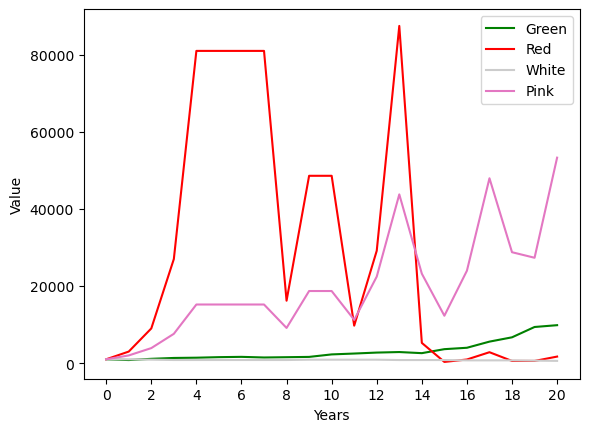

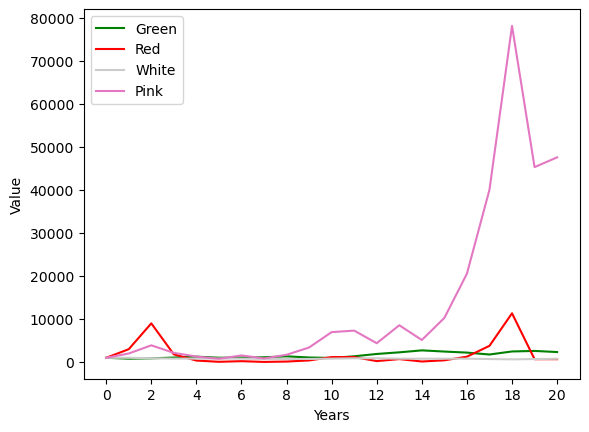

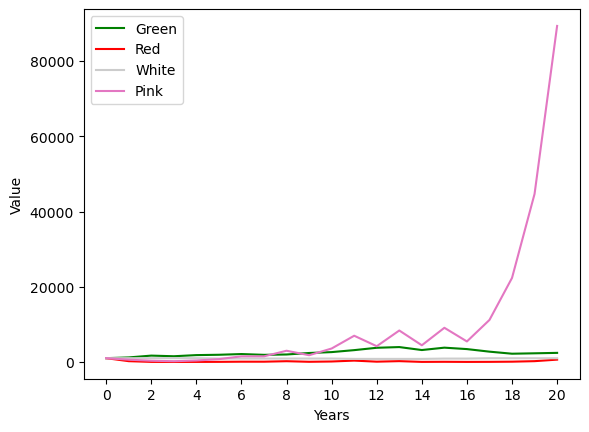

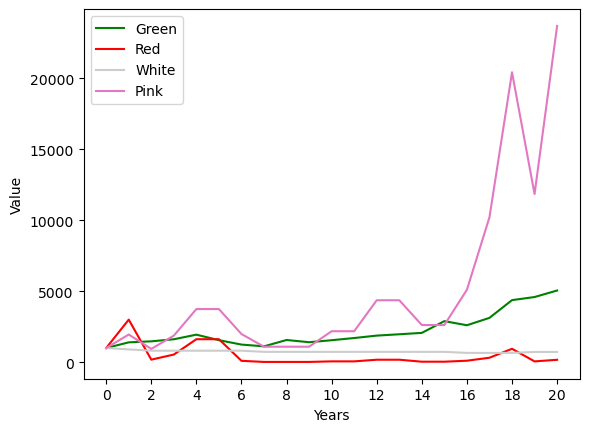

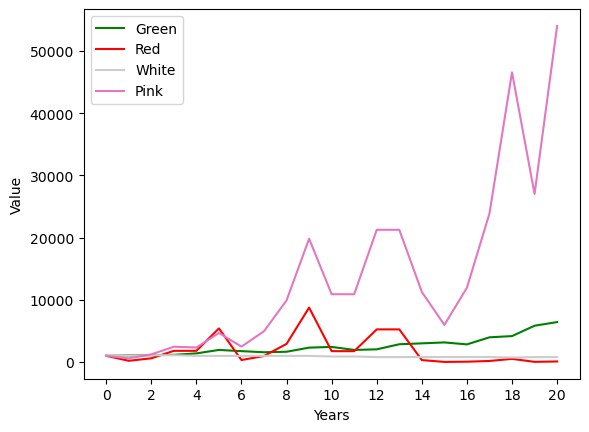

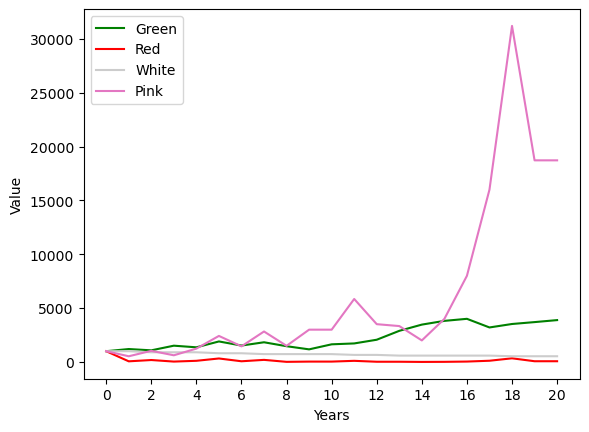

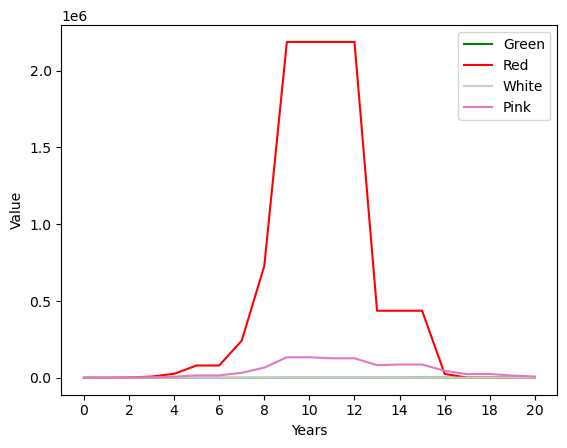

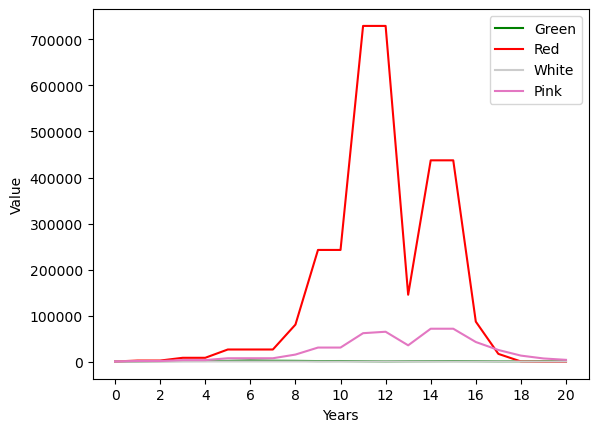

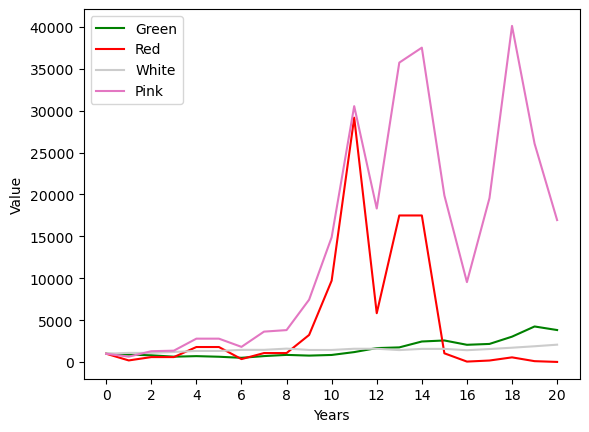

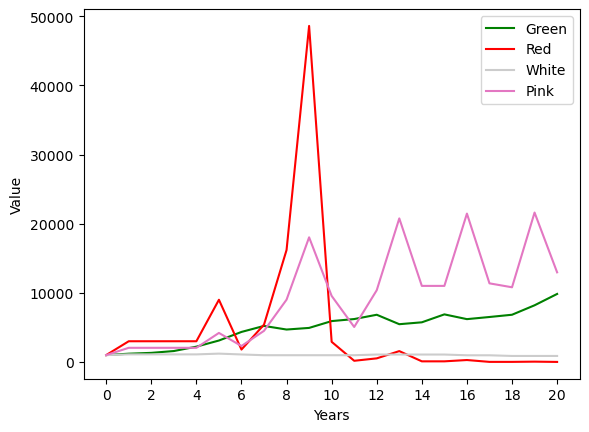

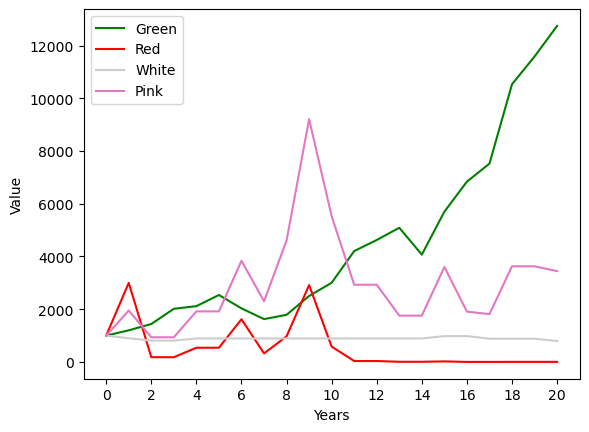

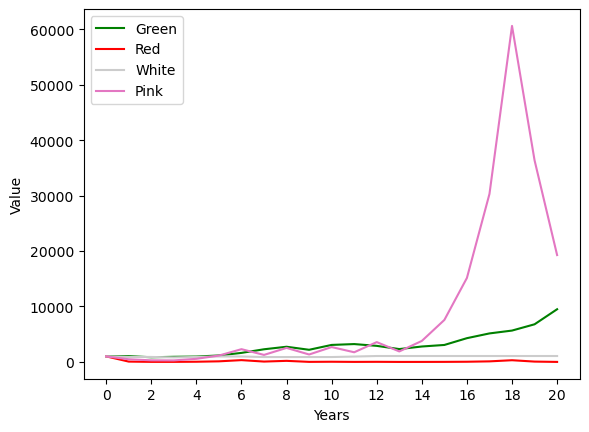

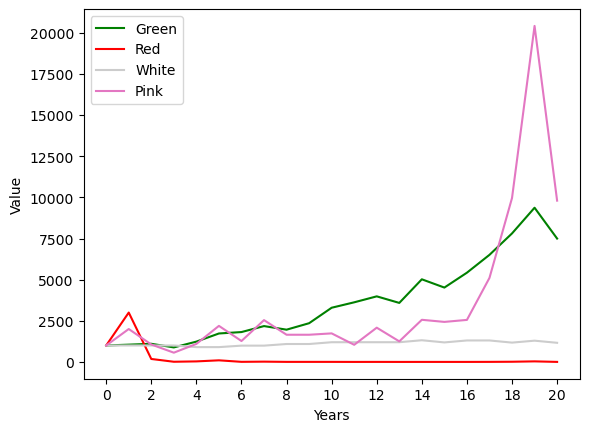

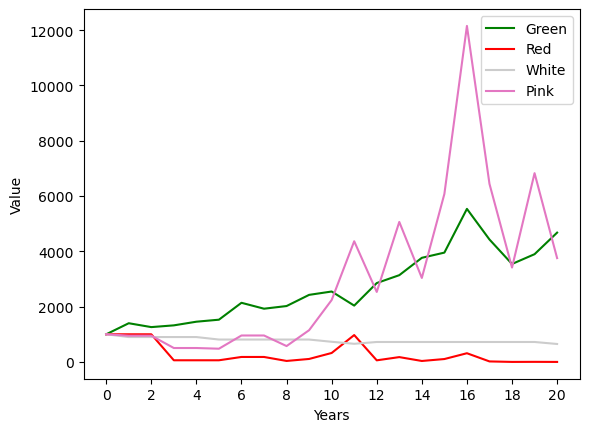

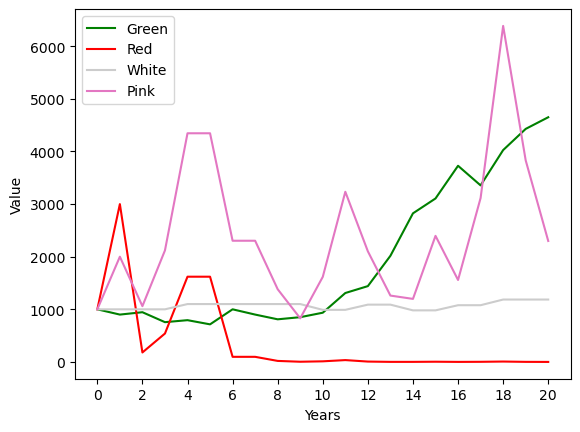

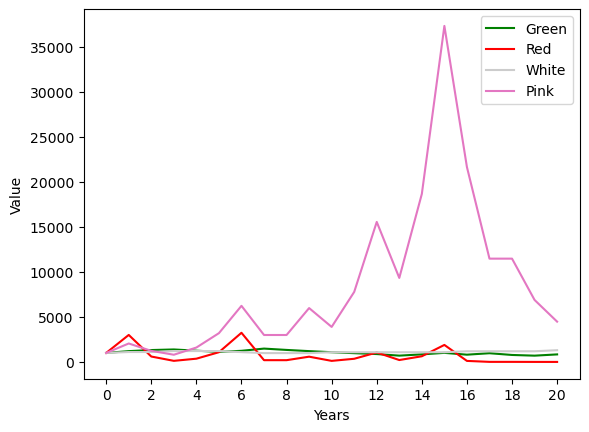

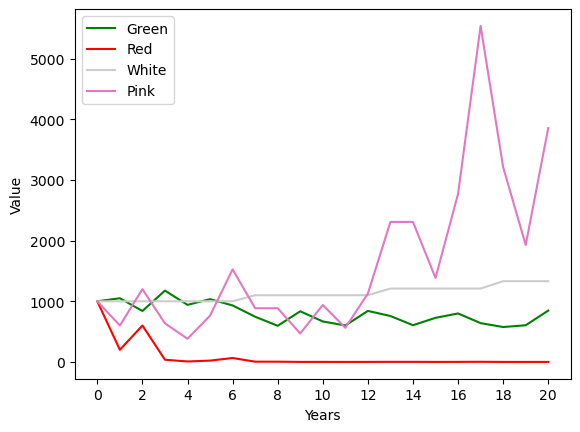

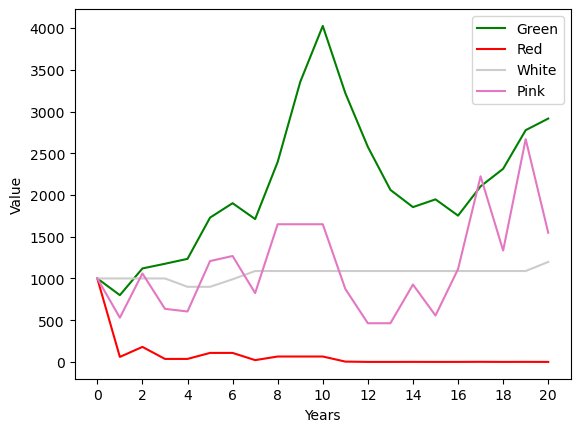

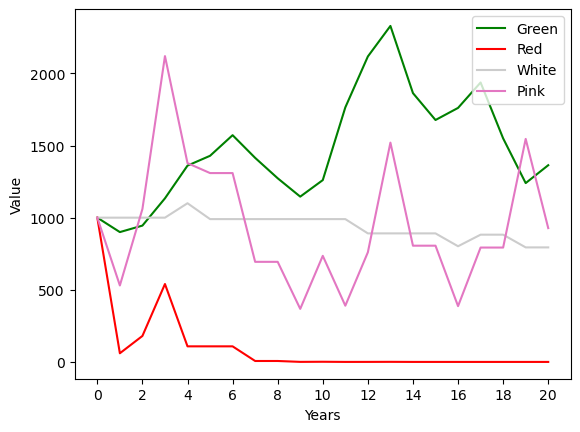

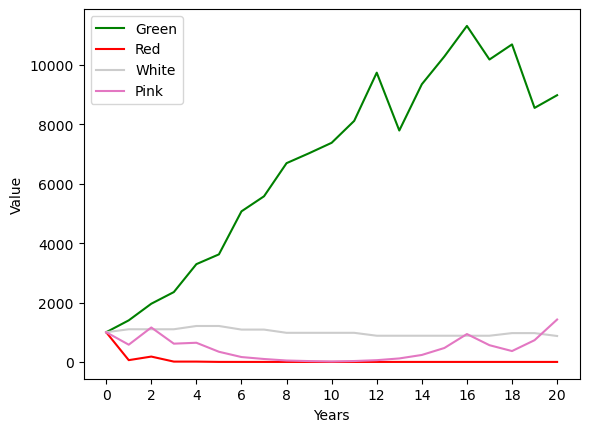

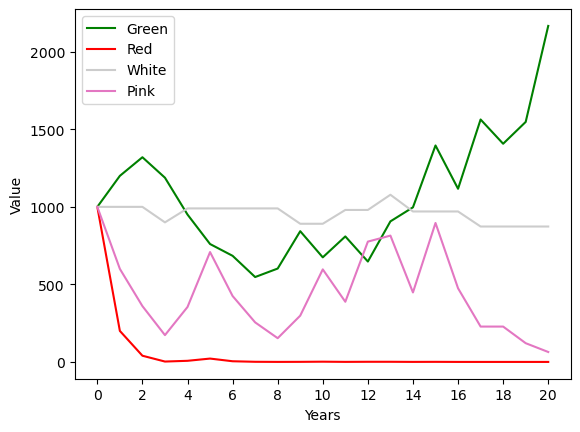

In [153]:
# Run the original experiment. The results are sorted in descending order of the final
# value for red, so the anomalous, so-called "Warren Buffett"s are at the top.
    
simulations = sorted([get_simulation() for i in range(TRIALS)], key=lambda l: l['red'][-1], reverse=True)
for simul in simulations:
    plot_simulation(simul)


In [181]:
# Experiment with different percentages of red and white in the pink blend:

TRIALS = 250
INCRMNT = .2

data = {}
for p in range(int(1 / INCRMNT) + 1):
    simulations = [get_simulation(round(p * INCRMNT, 2)) for i in range(TRIALS)]
    #data['Red (R/W: ' + str(round(p * INCRMNT, 2)) + '/' + str(round(1 - p * INCRMNT, 2)) + ')'] = [simul['red'][-1] for simul in simulations]
    data['Pink (R/W: ' + str(round(p * INCRMNT, 2)) + '/' + str(round(1 - p * INCRMNT, 2)) + ')'] = [simul['pink'][-1] for simul in simulations]

df = pd.DataFrame.from_dict(data)
df.describe()

,Pink (R/W: 0.0/1.0),Pink (R/W: 0.2/0.8),Pink (R/W: 0.4/0.6),Pink (R/W: 0.6/0.4),Pink (R/W: 0.8/0.2),Pink (R/W: 1.0/0.0)
count,250.000000,250.000000,2.500000e+02,2.500000e+02,2.500000e+02,2.500000e+02
mean,997.200322,14729.874516,1.387659e+05,1.200813e+06,1.444296e+06,3.673619e+06
std,254.509353,19736.672817,3.813827e+05,1.202943e+07,7.004310e+06,3.837720e+07
min,526.126590,375.864056,4.380400e+01,8.051198e+00,5.750337e-03,2.612139e-08
25%,795.885750,3886.107340,4.393401e+03,3.632003e+03,2.026086e+02,3.093979e-01
50%,970.299000,8124.088069,2.641901e+04,2.307018e+04,6.592048e+03,1.836660e+01
75%,1174.061790,17611.299033,8.646389e+04,1.117720e+05,1.008556e+05,3.127235e+03
max,1771.561000,159260.587686,3.246994e+06,1.883212e+08,7.807375e+07,5.165607e+08


In [184]:
df.mean()

Pink (R/W: 0.0/1.0)    9.972003e+02
Pink (R/W: 0.2/0.8)    1.472987e+04
Pink (R/W: 0.4/0.6)    1.387659e+05
Pink (R/W: 0.6/0.4)    1.200813e+06
Pink (R/W: 0.8/0.2)    1.444296e+06
Pink (R/W: 1.0/0.0)    3.673619e+06
dtype: float64

In [185]:
df.median()

Pink (R/W: 0.0/1.0)      970.299000
Pink (R/W: 0.2/0.8)     8124.088069
Pink (R/W: 0.4/0.6)    26419.012307
Pink (R/W: 0.6/0.4)    23070.184095
Pink (R/W: 0.8/0.2)     6592.048212
Pink (R/W: 1.0/0.0)       18.366601
dtype: float64